# ***EDA (KEŞİFSEL VERİ ANALİZİ)***









In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Unnamed: 0,datetime,temp,humidity,dewPoint,appTemp,precipitation,pressure,surfacePressure,cloudCover,windSpeed10m,windSpeed100m,windDir10m,windDir100m,windGusts10m,prod
0,0,2020-01-01 00:00:00,-5.3,98,-5.5,-9.7,0.0,1021.2,828.9,89,10.7,16.0,57,46,21.2,3.40
1,1,2020-01-01 01:00:00,-5.2,97,-5.5,-9.6,0.0,1020.9,828.7,90,10.9,17.8,63,48,22.7,2.97
2,2,2020-01-01 02:00:00,-6.7,97,-7.1,-11.3,0.0,1020.7,827.6,90,11.3,16.6,63,42,23.0,1.28
3,3,2020-01-01 03:00:00,-3.7,99,-3.8,-7.9,0.0,1021.0,829.7,90,10.9,19.3,27,29,23.4,1.29
4,4,2020-01-01 04:00:00,-3.3,99,-3.5,-7.5,0.0,1020.7,829.7,90,10.6,19.6,24,26,23.8,2.85


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       26304 non-null  int64  
 1   datetime         26304 non-null  object 
 2   temp             26304 non-null  float64
 3   humidity         26304 non-null  int64  
 4   dewPoint         26304 non-null  float64
 5   appTemp          26304 non-null  float64
 6   precipitation    26304 non-null  float64
 7   pressure         26304 non-null  float64
 8   surfacePressure  26304 non-null  float64
 9   cloudCover       26304 non-null  int64  
 10  windSpeed10m     26304 non-null  float64
 11  windSpeed100m    26304 non-null  float64
 12  windDir10m       26304 non-null  int64  
 13  windDir100m      26304 non-null  int64  
 14  windGusts10m     26304 non-null  float64
 15  prod             26304 non-null  float64
dtypes: float64(10), int64(5), object(1)
memory usage: 3.2+ MB


In [5]:
test.head()

,Unnamed: 0,datetime,temp,humidity,dewPoint,appTemp,precipitation,pressure,surfacePressure,cloudCover,windSpeed10m,windSpeed100m,windDir10m,windDir100m,windGusts10m,prod
0,0,2023-01-01 00:00:00,-3.3,83,-5.8,-7.6,0.0,1033.1,839.8,0,10.3,21.4,29,27,24.8,NaN
1,1,2023-01-01 01:00:00,-3.4,82,-6.0,-7.8,0.0,1033.1,839.8,0,10.7,21.6,33,28,25.2,NaN
2,2,2023-01-01 02:00:00,-3.5,81,-6.3,-8.0,0.0,1032.6,839.3,0,10.8,21.4,37,33,25.2,NaN
3,3,2023-01-01 03:00:00,-4.2,81,-6.9,-8.8,0.0,1032.7,838.9,9,11.6,23.3,36,35,25.2,NaN
4,4,2023-01-01 04:00:00,-4.2,81,-7.0,-9.0,0.0,1032.5,838.8,17,12.6,23.7,37,36,28.4,NaN


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    int64  
 1   datetime         744 non-null    object 
 2   temp             744 non-null    float64
 3   humidity         744 non-null    int64  
 4   dewPoint         744 non-null    float64
 5   appTemp          744 non-null    float64
 6   precipitation    744 non-null    float64
 7   pressure         744 non-null    float64
 8   surfacePressure  744 non-null    float64
 9   cloudCover       744 non-null    int64  
 10  windSpeed10m     744 non-null    float64
 11  windSpeed100m    744 non-null    float64
 12  windDir10m       744 non-null    int64  
 13  windDir100m      744 non-null    int64  
 14  windGusts10m     744 non-null    float64
 15  prod             0 non-null      float64
dtypes: float64(10), int64(5), object(1)
memory usage: 93.1+ KB


Eksik veri yok (sadece tahmin edeceğimiz prod sütunu boş, bu normal)




In [7]:
print(train.describe())
print(test.describe())

         Unnamed: 0          temp      humidity      dewPoint       appTemp  \
count  26304.000000  26304.000000  26304.000000  26304.000000  26304.000000   
mean   13151.500000      8.953250     61.684459      0.467857      5.236637   
std     7593.455077      9.593711     24.365156      5.804306     10.550103   
min        0.000000    -17.700000      9.000000    -21.500000    -23.400000   
25%     6575.750000      1.500000     41.000000     -2.900000     -2.700000   
50%    13151.500000      8.800000     61.000000      0.900000      5.300000   
75%    19727.250000     16.600000     84.000000      4.500000     13.600000   
max    26303.000000     31.300000    100.000000     15.700000     30.700000   

       precipitation      pressure  surfacePressure    cloudCover  \
count   26304.000000  26304.000000     26304.000000  26304.000000   
mean        0.050240   1015.951616       833.009979     28.206432   
std         0.263673      5.812352         4.473417     37.215008   
min         

Ön inceleme


*   Veri ön işlemlerinii yapalım
*   Testteki prod sütununu tahmin etmeye çalışacağız
*   Zaman serisi analizi olabilir. Datetime sütununu inceleyelim
*   Modeli eğiteceğimiz kısım "train" kısmı olacak






# Tekrarlanan verimiz var mı?

In [8]:
train.duplicated().sum()

np.int64(0)

# Eksik verimiz var mı

In [9]:
train.isnull().sum().sum()

np.int64(0)

# İndeks sütunumuzu veriden atabiliriz

In [10]:
train = train.drop(columns=["Unnamed: 0"])
test = test.drop(columns=["Unnamed: 0"])

# Outlier değerimiz var mı?

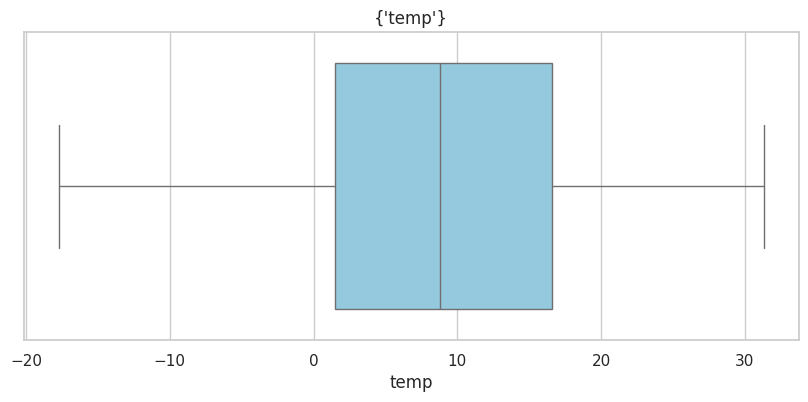

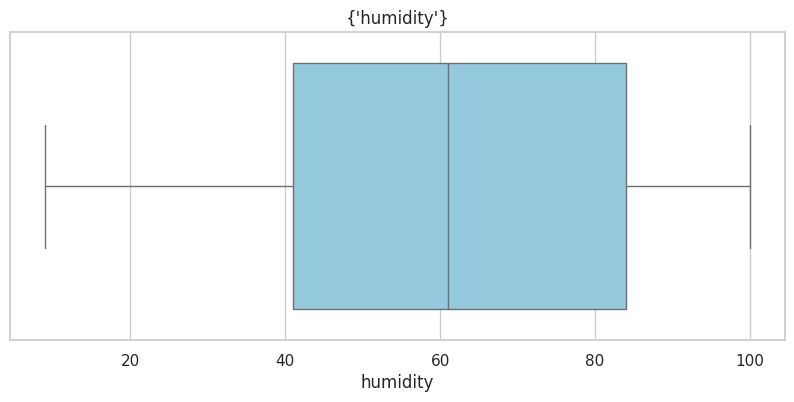

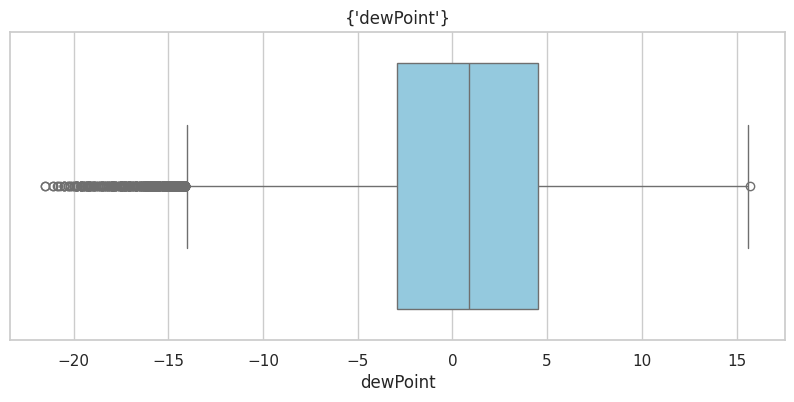

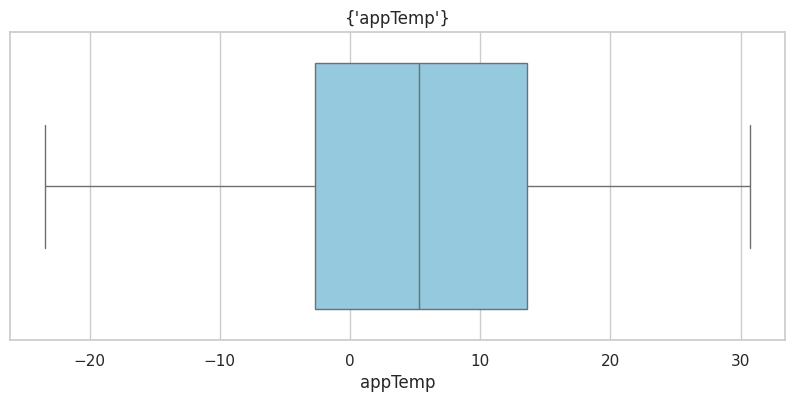

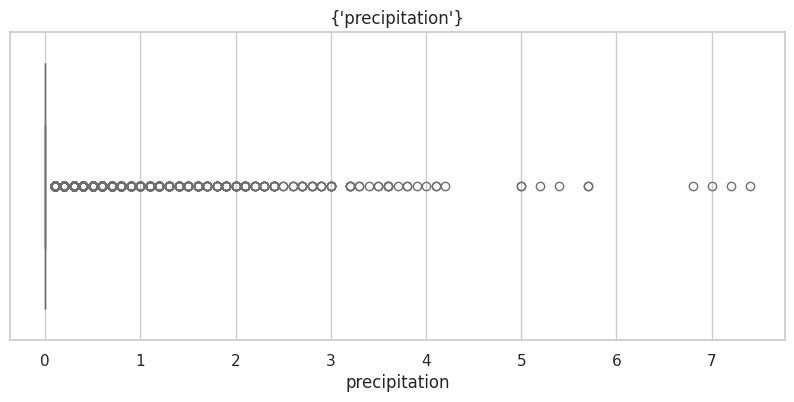

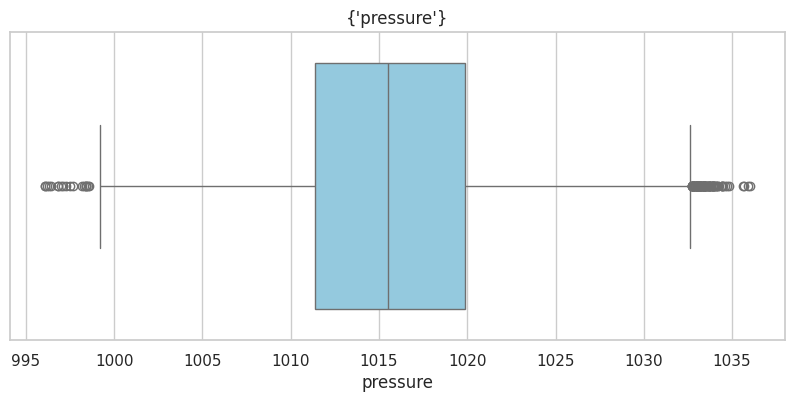

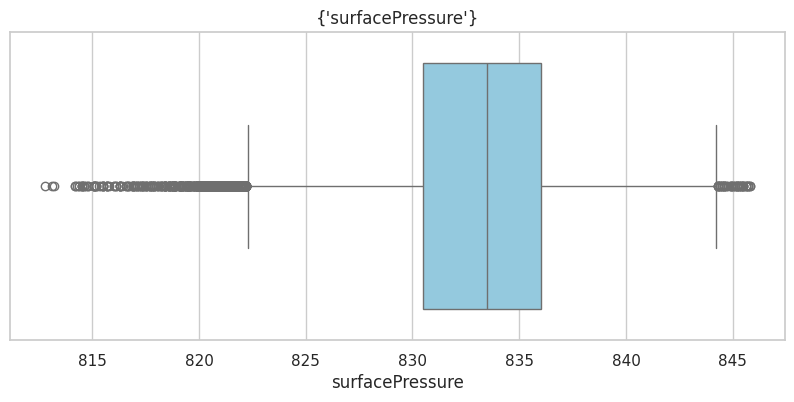

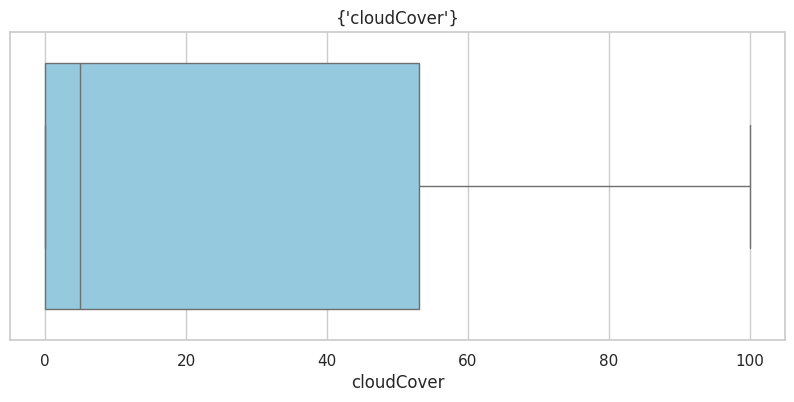

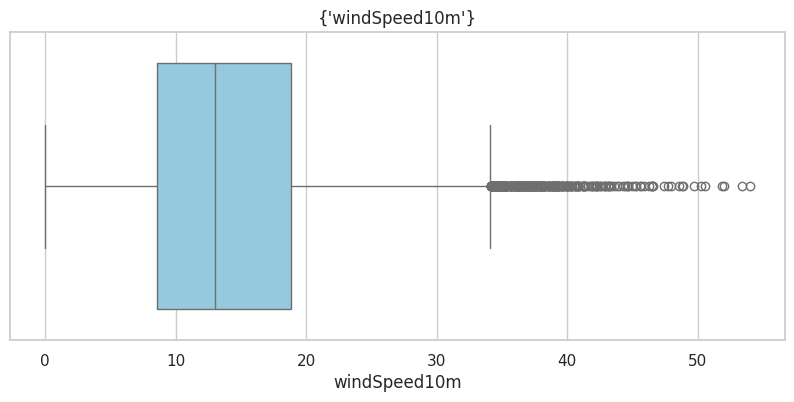

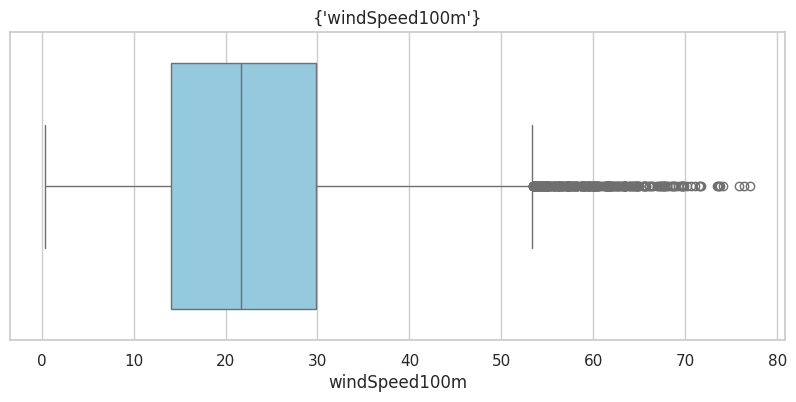

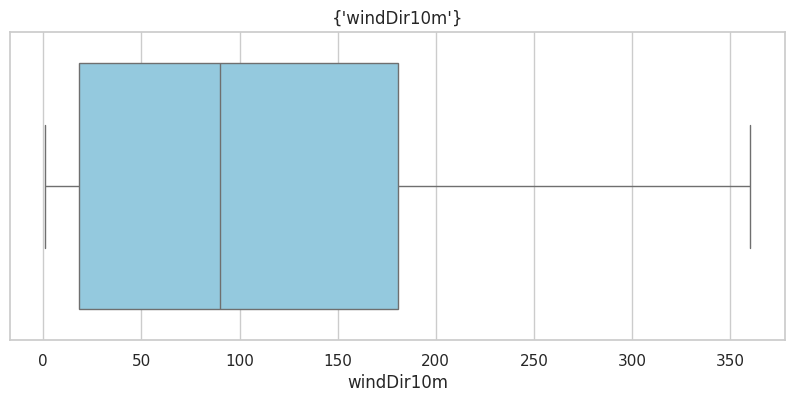

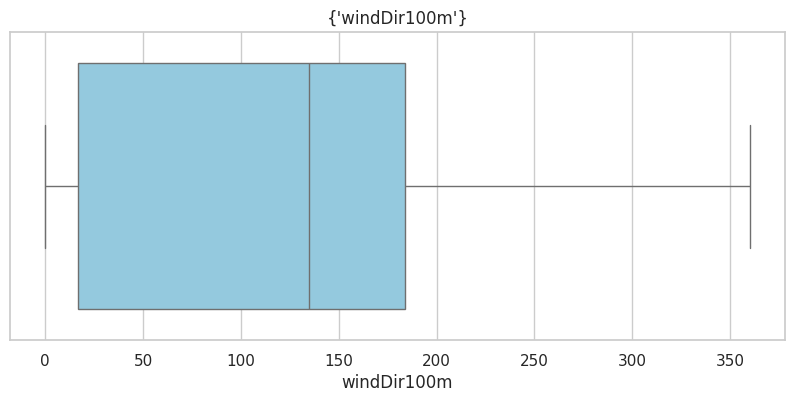

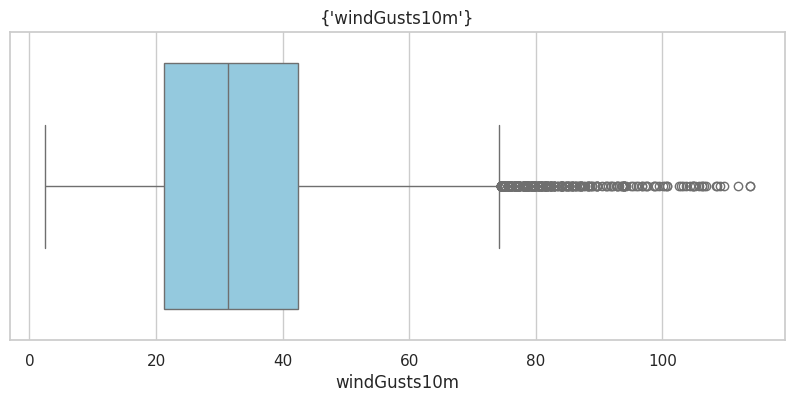

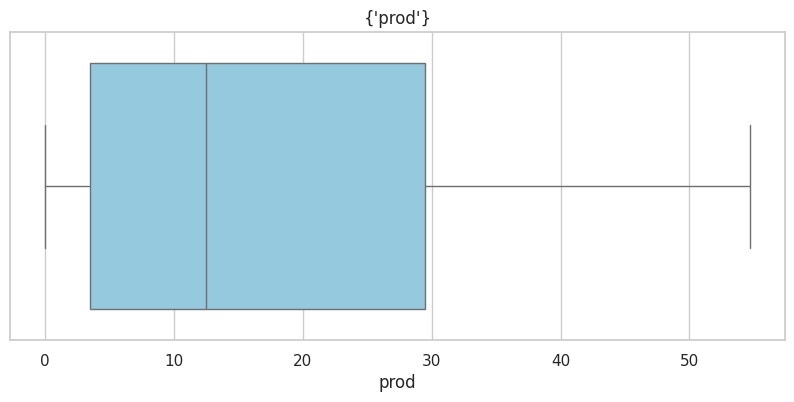

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=train, x=col, color='skyblue')
    plt.title({col})
    plt.xlabel(col)
    plt.show()

Sayısal olarak  bir çıktımız olursa daha net yorum yapabiliriz gibi. Çünkü aykırı değerlerimiz fazla gözüküyor

In [12]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    count, lower, upper = detect_outliers_iqr(train, col)
    print(f"{col}: {count} aykırı değer ")

temp: 0 aykırı değer 
humidity: 0 aykırı değer 
dewPoint: 448 aykırı değer 
appTemp: 0 aykırı değer 
precipitation: 2737 aykırı değer 
pressure: 118 aykırı değer 
surfacePressure: 597 aykırı değer 
cloudCover: 0 aykırı değer 
windSpeed10m: 335 aykırı değer 
windSpeed100m: 296 aykırı değer 
windDir10m: 0 aykırı değer 
windDir100m: 0 aykırı değer 
windGusts10m: 320 aykırı değer 
prod: 0 aykırı değer 


Evet aykırı değerlerimiz var ama bunları incelediğimde, doğal yollarla oluşmuş gibi gözüküyor. Aynı zamanda test verisinde de olabilir. Bu sefer test verisini güzel tahmin edemeyebiliriz. Şuanlık outlier değerlerine dokunmamayı tercih ediyorum.

# Zaman serisi analizi mi? Değil mi?

In [13]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

for df in [train, test]:
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['weekday'] = df['datetime'].dt.weekday

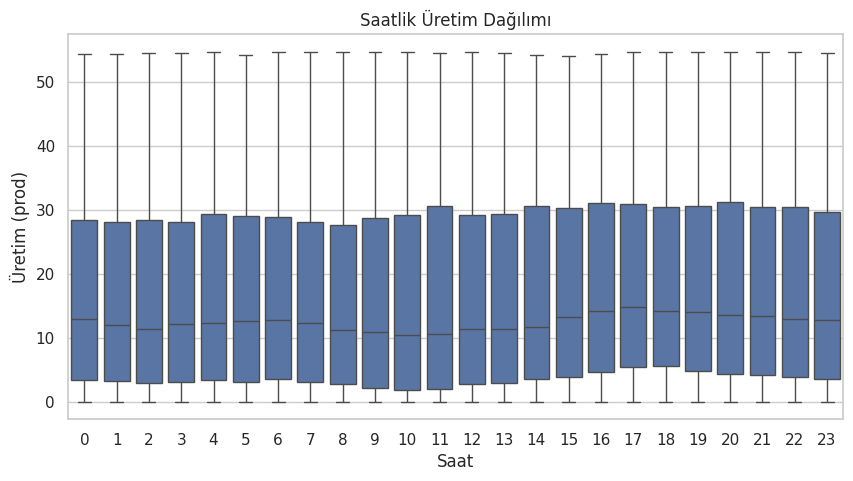

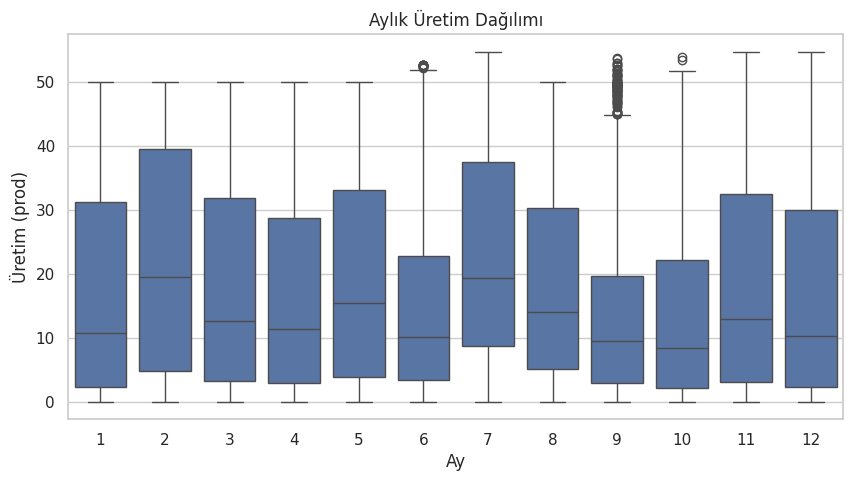

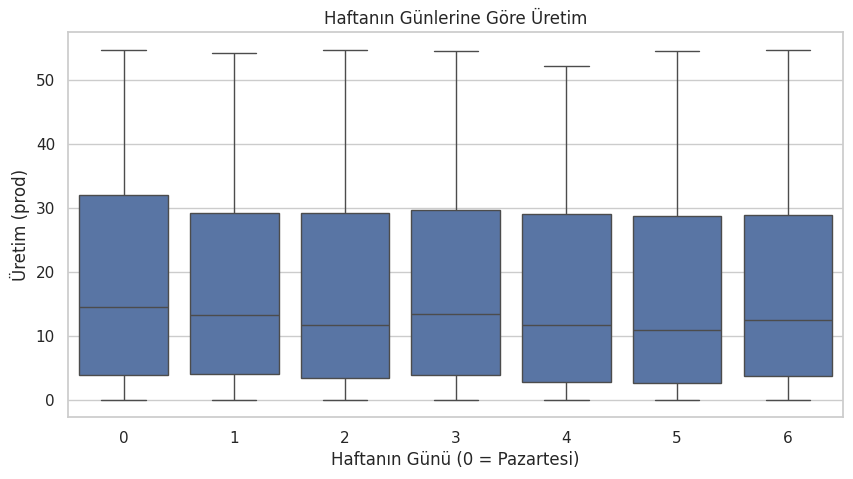

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='prod', data=train)
plt.title("Saatlik Üretim Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Üretim (prod)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='prod', data=train)
plt.title("Aylık Üretim Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Üretim (prod)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='prod', data=train)
plt.title("Haftanın Günlerine Göre Üretim")
plt.xlabel("Haftanın Günü (0 = Pazartesi)")
plt.ylabel("Üretim (prod)")
plt.show()


Aylık ortalama da dikkat çeken trendler var. Farklı grafiklerle inceleyelim

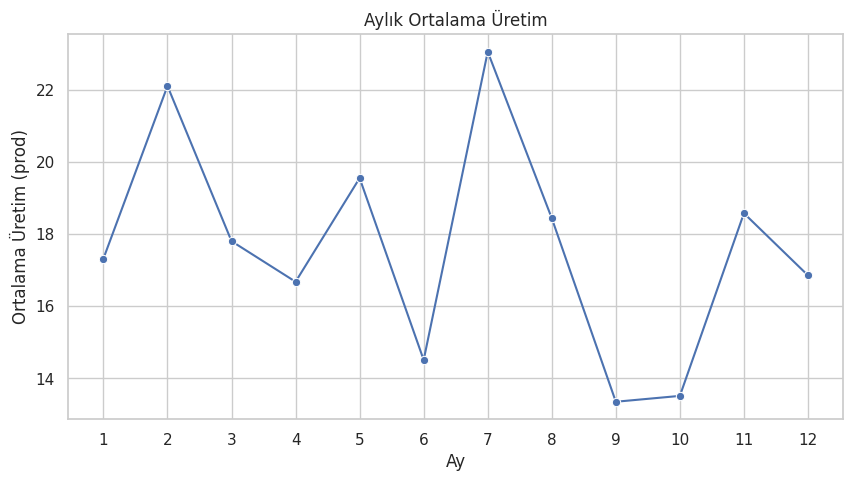

In [15]:
monthly_mean = train.groupby('month')['prod'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_mean.index, y=monthly_mean.values, marker="o")
plt.title("Aylık Ortalama Üretim")
plt.xlabel("Ay")
plt.ylabel("Ortalama Üretim (prod)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Günlük üretimi inceleyelim

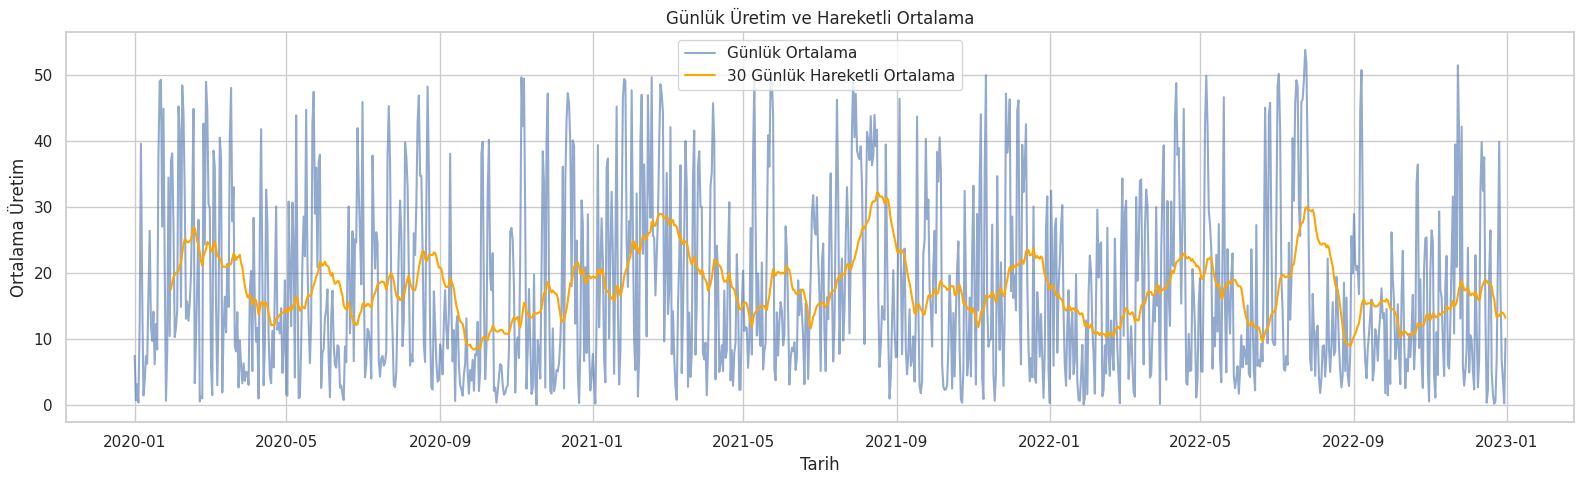

In [16]:
train['date'] = train['datetime'].dt.date
daily_mean = train.groupby('date')['prod'].mean()

plt.figure(figsize=(16, 5))
plt.plot(daily_mean.index, daily_mean.values, label='Günlük Ortalama', alpha=0.6)

rolling_mean = daily_mean.rolling(window=30).mean()
plt.plot(daily_mean.index, rolling_mean, label='30 Günlük Hareketli Ortalama', color='orange')

plt.title("Günlük Üretim ve Hareketli Ortalama")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Üretim")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Bu grafiklere baktığımızda, mevsimsel geçişlerde net bir trend yapısı inceleniyor. Kısa dönem olsa da her yıl eylül ayında yüksek üretim sergiliyor. Zamanın etkisi vardır diyebiliriz

# Korelasyon matrisini inceleyelim

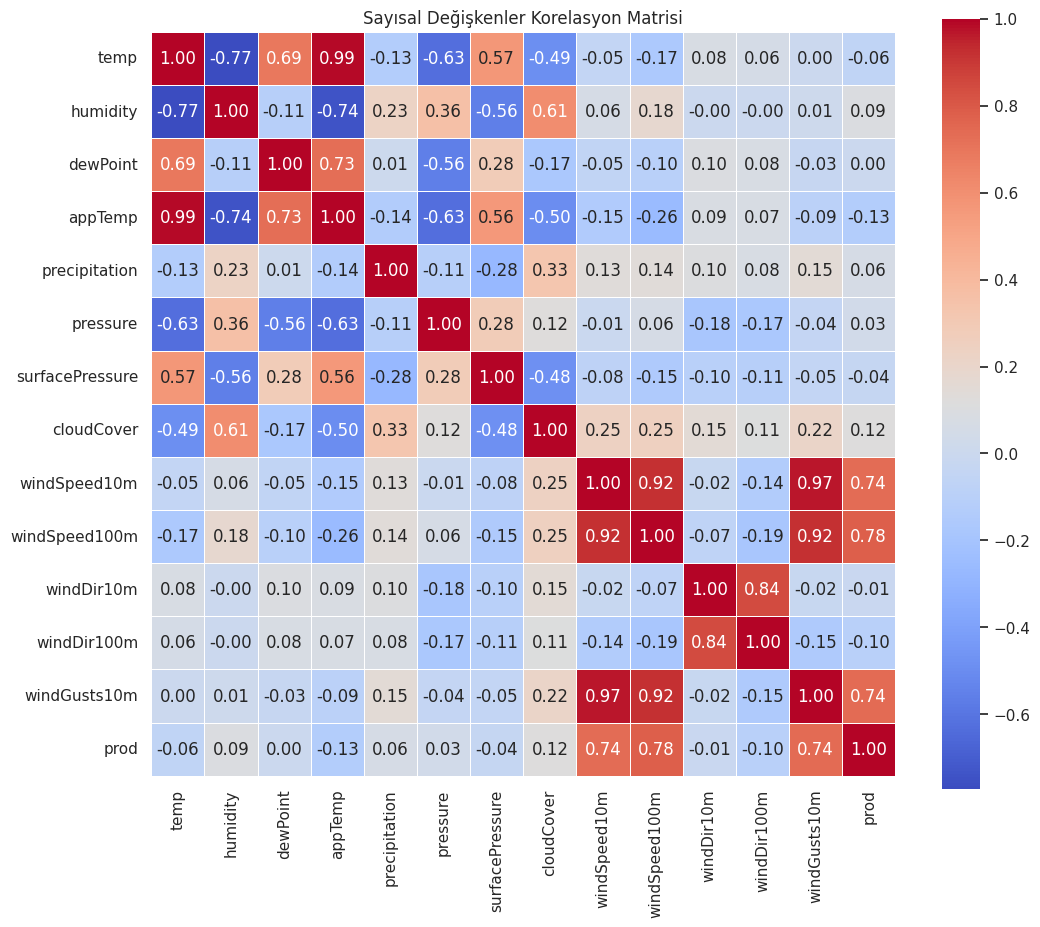

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = train[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()



*   temp ve appTemp değişkenleri yüksek korelasyon gösterdiğinden yalnızca appTemp tutulmuştur. Hissedilen sıcaklığın enerji üretimi üzerinde daha etkili olduğu varsayılmıştır.
*   Diğer bir yüksek korelasyon gösteren windSpeed10m ve windGusts10m değişkenleri, windSpeed100m ile güçlü şekilde ilişkilendirildiğinden çıkarıldı. Bu sayede özellik tekrarından kaçınılarak modelde daha temiz giriş verisi sağlanmaya çalışıldı
   

In [20]:
train = train.drop(columns=["temp", "windSpeed10m", "windGusts10m", "date"])  #"is_weekend"
test = test.drop(columns=["temp", "windSpeed10m", "windGusts10m"])

# Hedef değişken ile bağımsız değişkenlerimizin korelasyonunu da incleyelim


In [21]:
corr_target = corr_matrix['prod'].sort_values(ascending=False)
print(corr_target)

prod               1.000000
windSpeed100m      0.780898
windGusts10m       0.743165
windSpeed10m       0.736954
cloudCover         0.117019
humidity           0.094415
precipitation      0.059805
pressure           0.034443
dewPoint           0.003234
windDir10m        -0.013194
surfacePressure   -0.035957
temp              -0.059303
windDir100m       -0.101056
appTemp           -0.130680
Name: prod, dtype: float64


Buradan rüzgar hızının model için çok önemli olduğunu anlayabiliyoruz

# Hedef değişkenin dağılımı

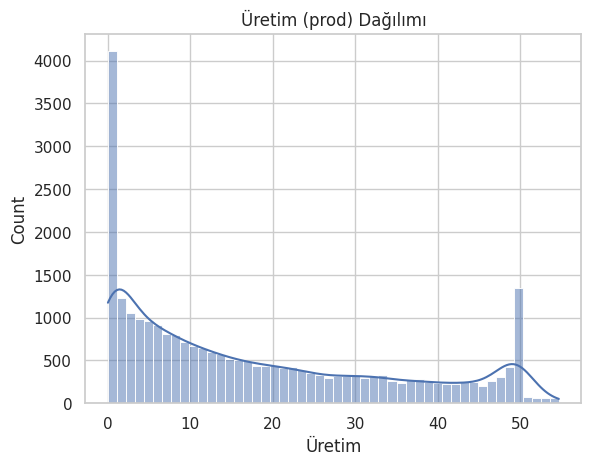

In [22]:
sns.histplot(train['prod'], bins=50, kde=True)
plt.title("Üretim (prod) Dağılımı")
plt.xlabel("Üretim")
plt.grid(True)
plt.show()


*   Sağa çarpık bir dağılım gözüküyor.
* Verinin çoğu küçük prod değerlerinde toplanmış.
* Bazı nadir zamanlarda çok yüksek üretim değerleri gözlemlenmiş.
* Model yüksek üretim değerlerini az tahmin etme eğiliminde olabilir.
*  Log dönüşümü gibi normalleştirici bir teknik kullanabiliriz  



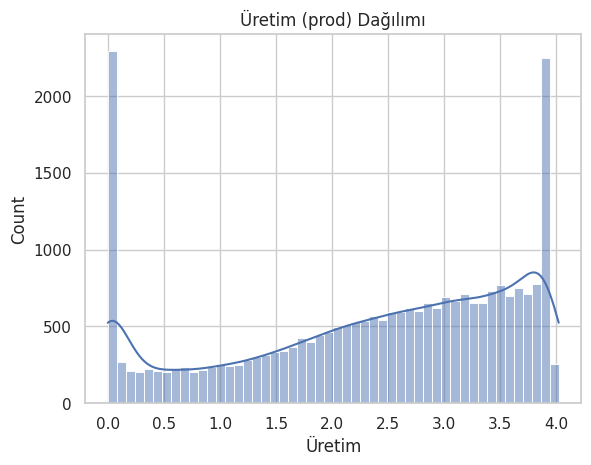

In [23]:
train['log_prod'] = np.log1p(train['prod'])
sns.histplot(train['log_prod'], bins=50, kde=True)
plt.title("Üretim (prod) Dağılımı")
plt.xlabel("Üretim")
plt.grid(True)
plt.show()

Hedef değişken prod'a uygulanan log dönüşümüyle dağılım daha düz hale gelmiş ancak hâlâ uçlarda yoğunlaşma gözlemlenmiştir. Bu durum verinin doğasından kaynaklanmakta olup, ağaç tabanlı modellerle doğrudan kullanılmasına engel teşkil etmemektedir. Ancak lineer modellere geçilirse log dönüşümlü versiyon tercih edilerek model çıktısı geri logaritmik olarak çevrilebilir.

In [24]:
train = train.drop(columns=["log_prod"])

# Veri Sızıntısı Kontrolü

# ***MODELLEME***

In [28]:
train.shape

(26304, 16)

Verimizde 26304 satır var. Ve bu sebepten modelimizi train, test ve validation olarak ayıracaz. Çünkü bu tarz verilerde validation kullanılır. Model yeni veri görünce ne kadar başarılı olacak işte bunu x_val ile öğreneceğiz

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = train[['prod']]
X = train.drop(columns=['prod', "datetime"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("\nDoğrusal Regresyon Performansı:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


Doğrusal Regresyon Performansı:
MAE  : 7.580
RMSE : 9.797
R²   : 0.640
